In [289]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import log_loss
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier

# Loading & Finalizing Data

In [2]:
df = pd.read_csv('final.csv')
df

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,B,C,C#,D,D#,E,F,F#,G,G#
0,R&B,Mary J. Blige,Be Without You - Kendu Mix,2YegxR5As7BeQuVp2U6pek,0.84,-0.200815,0.592157,0.303964,0.191327,-0.001247,...,0,0,0,1,0,0,0,0,0,0
1,R&B,Rihanna,Desperado,6KFaHC9G178beAp7P0Vi5S,0.76,0.161558,0.439216,-0.425496,-0.010204,-0.001247,...,0,1,0,0,0,0,0,0,0,0
2,R&B,Yung Bleu,Ice On My Baby (feat. Kevin Gates) - Remix,6muW8cSjJ3rusKJ0vH5olw,0.72,-0.224219,0.741176,-0.266447,-0.239796,-0.001142,...,0,0,0,0,0,0,1,0,0,0
3,R&B,Surfaces,Heaven Falls / Fall on Me,7yHqOZfsXYlicyoMt62yC6,0.68,0.217424,-0.039216,0.234071,-0.632653,0.063210,...,1,0,0,0,0,0,0,0,0,0
4,R&B,Olivia O'Brien,Love Myself,4XzgjxGKqULifVf7mnDIQK,0.96,0.573758,0.313725,-0.090655,0.017857,-0.001247,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224914,Soul,Slave,Son Of Slide,2XGLdVl7lGeq8ksM6Al7jT,-0.20,-0.320338,0.447059,1.277620,0.255102,14.428462,...,0,0,0,1,0,0,0,0,0,0
224915,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,-0.24,-0.276461,0.831373,0.744008,0.176020,0.022095,...,0,0,0,0,0,1,0,0,0,0
224916,Soul,Muddy Waters,(I'm Your) Hoochie Coochie Man,2ziWXUmQLrXTiYjCg2fZ2t,0.12,1.034274,-0.219608,-0.663186,-0.497449,-0.001247,...,0,0,0,1,0,0,0,0,0,0
224917,Soul,R.LUM.R,With My Words,6EFsue2YbIG4Qkq8Zr9Rir,0.00,0.069455,0.674510,0.012855,0.229592,-0.001247,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# Converts 'artist_name' and 'track_name' to uppercase
df[['artist_name','track_name']] = df[['artist_name','track_name']].apply(lambda x: x.astype(str).str.upper())

In [4]:
# Drops all but one row of duplicate track rows and tracks classified into more than one genre
df.drop_duplicates(subset = ['track_id'], inplace=True)
df.drop_duplicates(subset = ['artist_name', 'track_name'], inplace=True)

In [5]:
# Drops classes
df = df[(df['genre'] != 'Reggaeton') & (df['genre'] != 'Children’s Music') & (df['genre'] != 'Rock') & (df['genre'] != 'Folk') & (df['genre'] != 'World') & (df['genre'] != 'Jazz') & (df['genre'] != 'R&B') & (df['genre'] != 'Dance') & (df['genre'] != 'Blues') & (df['genre'] != 'Anime') & (df['genre'] != 'Alternative') & (df['genre'] != 'A Capella') & (df['genre'] != 'Indie') & (df['genre'] != 'Pop') & (df['genre'] != 'Rap') & (df['genre'] != 'Reggae') & (df['genre'] != 'Soul')]
df 

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,...,B,C,C#,D,D#,E,F,F#,G,G#
280,Country,CAM,MY MISTAKE,5ICoYTFfmUKguBHpINKkGL,0.04,-0.313740,-0.086275,-0.260439,0.229592,-0.001187,...,0,0,0,0,0,0,0,0,0,1
281,Country,KEVIN FOWLER,THAT GIRL,0rk6JE7ODyGWWquK4y7t1u,-0.08,-0.285067,-0.776471,-0.160840,0.625000,-0.001247,...,0,0,0,0,0,0,0,0,1,0
282,Country,ROGER MILLER,CHUG-A-LUG,3vMwtAfDNM8dDBWMvS78pn,0.08,0.715688,0.494118,-1.194446,-0.525510,0.004562,...,1,0,0,0,0,0,0,0,0,0
283,Country,M. WARD,CHINESE TRANSLATION,7IJlk42gDKt5dfSSLwtEsp,0.40,-0.096633,-0.070588,0.209738,0.285714,0.003475,...,0,0,0,1,0,0,0,0,0,0
284,Country,CHRIS CAGLE,ANYWHERE BUT HERE,2JxSaSRavL82FCTCPzVmEf,-0.08,0.536011,0.262745,0.263352,-0.346939,-0.001247,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208965,Country,COMMANDER CODY AND HIS LOST PLANET AIRMEN,HOT ROD LINCOLN,53Uge4bp2SiCXZLuhDJYLB,0.00,0.155519,0.490196,-0.687885,0.431122,-0.001247,...,0,0,0,0,0,1,0,0,0,0
208966,Country,JOHNNY CASH,TENNESSEE FLAT-TOP BOX,7robBaDSeyFRaxT0QhBifa,0.08,0.067945,0.337255,-0.514689,0.280612,0.045438,...,0,0,0,0,0,0,1,0,0,0
208967,Country,BAILEY BRYAN,SONGBIRD,2Xi6ImRr8RByoZ66r17SoA,0.00,0.850068,-0.792157,0.109822,-0.650510,-0.001247,...,0,0,1,0,0,0,0,0,0,0
208968,Country,CARRIE UNDERWOOD,LIKE I'LL NEVER LOVE YOU AGAIN,7utpHSZSjZY0u4OqeSNR9G,0.08,0.419749,-0.337255,-0.064507,-0.198980,-0.001029,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df['genre'].value_counts()

Comedy        9662
Electronic    9130
Soundtrack    8781
Classical     8659
Opera         8202
Ska           7970
Hip-Hop       7395
Country       7344
Name: genre, dtype: int64

In [7]:
features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'key_num', 'liveness', 'loudness', 'mode_num', 'speechiness', 'tempo', 'time_signature_num', 'valence']

In [8]:
# Creates X, Y, X_train, y_train, X_test, y_test  
X = df[features]
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0, stratify = y)

# Logistic Regression Model

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [9]:
lr = LogisticRegression(multi_class = 'multinomial', max_iter = 1000, random_state = 0, n_jobs = -1)
param_grid = {'C': [0.001,0.01,0.1,1]}

gs_lr = GridSearchCV(lr, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs= -1)
gs_lr.fit(X_train, y_train)
print(gs_lr.best_estimator_)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial', n_jobs=-1,
                   random_state=0)


2. Fits model & makes predictions

In [10]:
# LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial', n_jobs=-1,random_state=0)
lr = gs_lr.best_estimator_ 
lr.fit(X_train, np.ravel(y_train)) 
y_pred_lr = lr.predict(X_test) 

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, ROC Curve & AUC

In [11]:
print(classification_report(y_test, y_pred_lr, zero_division = 0)) 

              precision    recall  f1-score   support

   Classical       0.58      0.45      0.51      2165
      Comedy       0.97      0.95      0.96      2416
     Country       0.63      0.73      0.68      1836
  Electronic       0.72      0.64      0.68      2283
     Hip-Hop       0.74      0.79      0.76      1849
       Opera       0.70      0.74      0.72      2050
         Ska       0.67      0.69      0.68      1992
  Soundtrack       0.66      0.72      0.69      2195

    accuracy                           0.72     16786
   macro avg       0.71      0.71      0.71     16786
weighted avg       0.71      0.72      0.71     16786



In [12]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy, precision, recall, f1, logloss = [], [], [], [], []

accuracy.append(round(accuracy_score(y_test,y_pred_lr),2))
precision.append(round(precision_score(y_test, y_pred_lr, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_lr, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_lr, average = 'macro'),2))
lr_probas = lr.predict_proba(X_test)
logloss.append(round(log_loss(y_test, lr_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.72
Precision: 0.71
Recall: 0.71
F1-Score: 0.71
Log Loss: 0.77


In [13]:
# Computes ROC Curve & ROC Area

y_b = label_binarize(y, classes=['Classical', 'Comedy', 'Country', 'Electronic', 'Hip-Hop', 'Opera', 'Ska', 'Soundtrack'])
n_classes = y_b.shape[1]

fpr = dict()
tpr = dict() 
roc_auc = dict()
colors = ['blue', 'red', 'green', 'purple']

X_train_b, X_test_b, y_train_b, y_test_b = train_test_split(X, y_b, test_size = 0.25, random_state = 1, stratify = y)
                                                    
classifier = OneVsRestClassifier(lr)
y_score = classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)                                          

fpr["Logistic Regression"], tpr["Logistic Regression"], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc["Logistic Regression"] = auc(fpr["Logistic Regression"], tpr["Logistic Regression"])                           

print('Logistic Regression ROC Curve Area {0:.2f}'.format(roc_auc['Logistic Regression']))

Logistic Regression ROC Curve Area 0.94


5. Displays Confusion Matrix For A Look At Model Performace

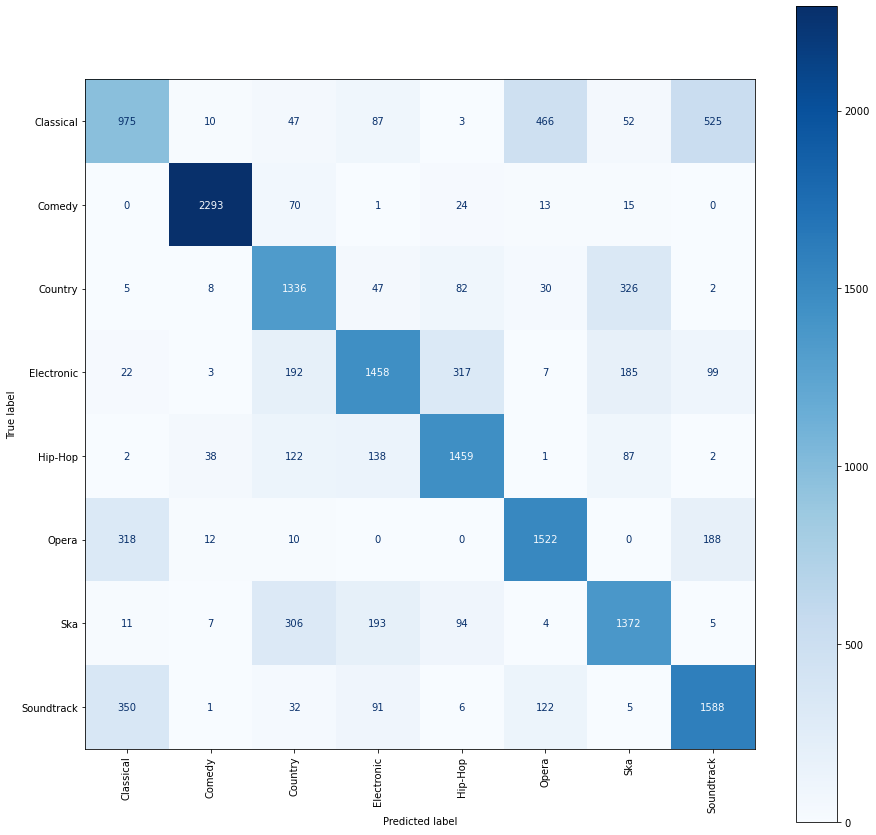

In [14]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(lr, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Random Forest Model

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [15]:
rf = RandomForestClassifier(random_state = 0)
param_grid = {'n_estimators': [100,300,500,700], 'criterion': ['gini', 'entropy']}

gs_rf = GridSearchCV(rf, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs= -1)
gs_rf.fit(X_train, y_train)
print(gs_rf.best_estimator_) 

RandomForestClassifier(criterion='entropy', n_estimators=700, random_state=0)


2. Fits model & makes predictions

In [16]:
# RandomForestClassifier(criterion='entropy', n_estimators=700, random_state=0)
rf = gs_rf.best_estimator_ 
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test) 

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, ROC Curve & AUC

In [17]:
print(classification_report(y_test, y_pred_rf, zero_division = 0)) 

              precision    recall  f1-score   support

   Classical       0.67      0.59      0.63      2165
      Comedy       0.98      0.95      0.97      2416
     Country       0.74      0.78      0.76      1836
  Electronic       0.77      0.78      0.78      2283
     Hip-Hop       0.80      0.85      0.82      1849
       Opera       0.76      0.77      0.77      2050
         Ska       0.76      0.75      0.75      1992
  Soundtrack       0.74      0.77      0.75      2195

    accuracy                           0.78     16786
   macro avg       0.78      0.78      0.78     16786
weighted avg       0.78      0.78      0.78     16786



In [18]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_rf),2))
precision.append(round(precision_score(y_test, y_pred_rf, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_rf, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_rf, average = 'macro'),2))
rf_probas = rf.predict_proba(X_test)
logloss.append(round(log_loss(y_test, rf_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.78
Precision: 0.78
Recall: 0.78
F1-Score: 0.78
Log Loss: 0.61


In [19]:
# Computes ROC Curve & ROC Area
                                                    
classifier = OneVsRestClassifier(rf)
y_score = classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)                                          

fpr["Random Forest"], tpr["Random Forest"], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc["Random Forest"] = auc(fpr["Random Forest"], tpr["Random Forest"])                           

print('Random Forest ROC Curve Area {0:.2f}'.format(roc_auc['Random Forest']))

Random Forest ROC Curve Area 0.97


5. Displays Confusion Matrix For A Look At Model Performace

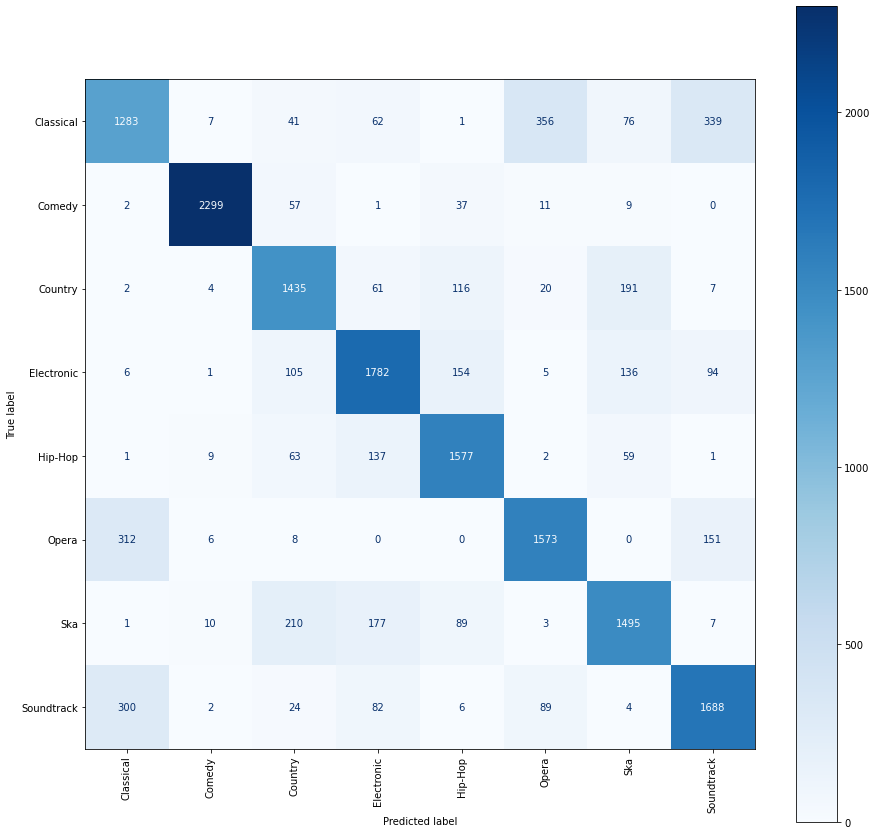

In [20]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(rf, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Gradient Boosting Model

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [21]:
gs_gb = GradientBoostingClassifier(random_state = 0)
param_grid = {'loss': ['deviance', 'exponential'], 'n_estimators': [100,300,500,700], 'learning_rate': [0.01,0.05,0.1]}
gs_gb = GridSearchCV(gs_gb, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)
gs_gb.fit(X_train, y_train)
print(gs_gb.best_estimator_)

GradientBoostingClassifier(learning_rate=0.05, n_estimators=700, random_state=0)


2. Fits model & makes predictions

In [22]:
# GradientBoostingClassifier(learning_rate=0.05, n_estimators=700, random_state=0)
gb = gs_gb.best_estimator_ 
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test) 

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, ROC Curve & AUC

In [23]:
print(classification_report(y_test, y_pred_gb, zero_division = 0)) 

              precision    recall  f1-score   support

   Classical       0.65      0.58      0.61      2165
      Comedy       0.98      0.95      0.96      2416
     Country       0.73      0.77      0.75      1836
  Electronic       0.78      0.77      0.78      2283
     Hip-Hop       0.81      0.86      0.83      1849
       Opera       0.75      0.75      0.75      2050
         Ska       0.76      0.76      0.76      1992
  Soundtrack       0.74      0.76      0.75      2195

    accuracy                           0.78     16786
   macro avg       0.77      0.78      0.77     16786
weighted avg       0.78      0.78      0.78     16786



In [24]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_gb),2))
precision.append(round(precision_score(y_test, y_pred_gb, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_gb, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_gb, average = 'macro'),2))
gb_probas = gb.predict_proba(X_test)
logloss.append(round(log_loss(y_test, gb_probas),2))

print('Accuracy: {}'.format(accuracy[-1])) 
print('Precision: {}'.format(precision[-1])) 
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1])) 
print('Log Loss: {}'.format(logloss[-1])) 

Accuracy: 0.78
Precision: 0.77
Recall: 0.78
F1-Score: 0.77
Log Loss: 0.59


In [25]:
# Computes ROC Curve & ROC Area
                                                    
classifier = OneVsRestClassifier(gb)
y_score = classifier.fit(X_train_b, y_train_b).predict_proba(X_test_b)                                          

fpr["Gradient Boosting"], tpr["Gradient Boosting"], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc["Gradient Boosting"] = auc(fpr["Gradient Boosting"], tpr["Gradient Boosting"])                           

print('Gradient Boosting ROC Curve Area {0:.2f}'.format(roc_auc['Gradient Boosting']))

Gradient Boosting ROC Curve Area 0.97


5. Displays Confusion Matrix For A Look At Model Performace

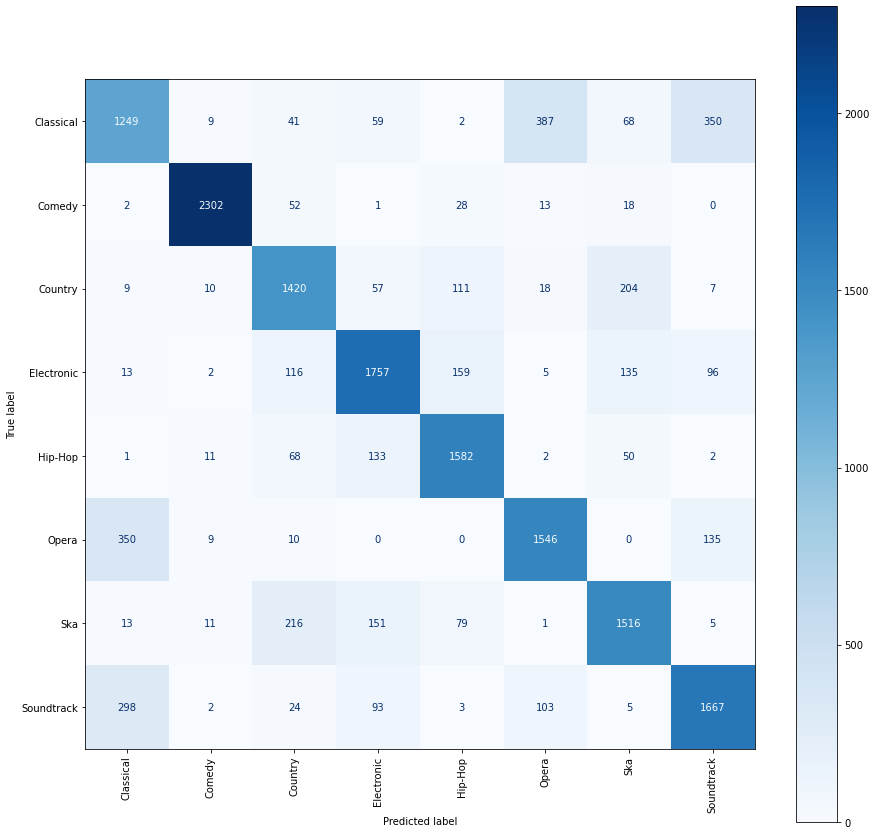

In [26]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(gb, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Linear Support Vector Machine (SVM) Model

1. Uses GridSearchCV for hyperparameter tuning to pick best model version

In [168]:
lsvm = LinearSVC(multi_class = 'ovr', random_state = 0, dual = False, max_iter = 1000)
param_grid = {'loss': ['hinge', 'squared_hinge'], 'C': [0.01,0.1,1]}

gs_lsvm = GridSearchCV(lsvm, param_grid = param_grid, cv = 3, scoring = "accuracy", n_jobs = -1)
gs_lsvm.fit(X_train, y_train)
print(gs_lsvm.best_estimator_)

LinearSVC(C=1, dual=False, random_state=0)


2. Fits model & makes predictions

In [169]:
# lsvm = LinearSVC(kernel='linear', probability = True)
lsvm = gs_lsvm.best_estimator_ 
lsvm.fit(X_train, y_train)
y_pred_lsvm = lsvm.predict(X_test) 

3. Calculates Accuracy, Precision, Recall, F1 Score, Log-Loss, ROC Curve & AUC

In [170]:
print(classification_report(y_test, y_pred_lsvm, zero_division = 0)) 

              precision    recall  f1-score   support

   Classical       0.59      0.39      0.47      2165
      Comedy       0.95      0.95      0.95      2416
     Country       0.64      0.63      0.63      1836
  Electronic       0.72      0.61      0.66      2283
     Hip-Hop       0.70      0.77      0.73      1849
       Opera       0.67      0.76      0.71      2050
         Ska       0.61      0.73      0.66      1992
  Soundtrack       0.62      0.70      0.66      2195

    accuracy                           0.69     16786
   macro avg       0.69      0.69      0.68     16786
weighted avg       0.69      0.69      0.69     16786



In [197]:
# Computes Accuracy, Precision, Recall, F1 Score, Log-Loss

accuracy.append(round(accuracy_score(y_test, y_pred_lsvm),2))
precision.append(round(precision_score(y_test, y_pred_lsvm, average = 'macro'),2))
recall.append(round(recall_score(y_test, y_pred_lsvm, average = 'macro'),2))
f1.append(round(f1_score(y_test, y_pred_lsvm, average = 'macro'),2))
clf = CalibratedClassifierCV(lsvm) 
clf.fit(X_train, y_train)
lsvm_probas = clf.predict_proba(X_test)
logloss.append(round(log_loss(y_test, lsvm_probas),2))

print('Accuracy: {}'.format(accuracy[-1]))
print('Precision: {}'.format(precision[-1]))
print('Recall: {}'.format(recall[-1])) 
print('F1-Score: {}'.format(f1[-1]))
print('Log Loss: {}'.format(logloss[-1]))

Accuracy: 0.69
Precision: 0.69
Recall: 0.69
F1-Score: 0.68
Log Loss: 0.85


In [198]:
# Computes ROC Curve - Area Under Curve
                                                    
classifier = OneVsRestClassifier(lsvm)
y_score = classifier.fit(X_train_b, y_train_b).decision_function(X_test_b)                                          

fpr["Linear Support Vector Machine (SVM)"], tpr["Linear Support Vector Machine (SVM)"], _ = roc_curve(y_test_b.ravel(), y_score.ravel())
roc_auc["Linear Support Vector Machine (SVM)"] = auc(fpr["Linear Support Vector Machine (SVM)"], tpr["Linear Support Vector Machine (SVM)"])                           

print('Linear Support Vector Machine (SVM) ROC-AUC {0:.2f}'.format(roc_auc['Linear Support Vector Machine (SVM)']))

Linear Support Vector Machine (SVM) ROC-AUC 0.94


5. Displays Confusion Matrix For A Look At Model Performace

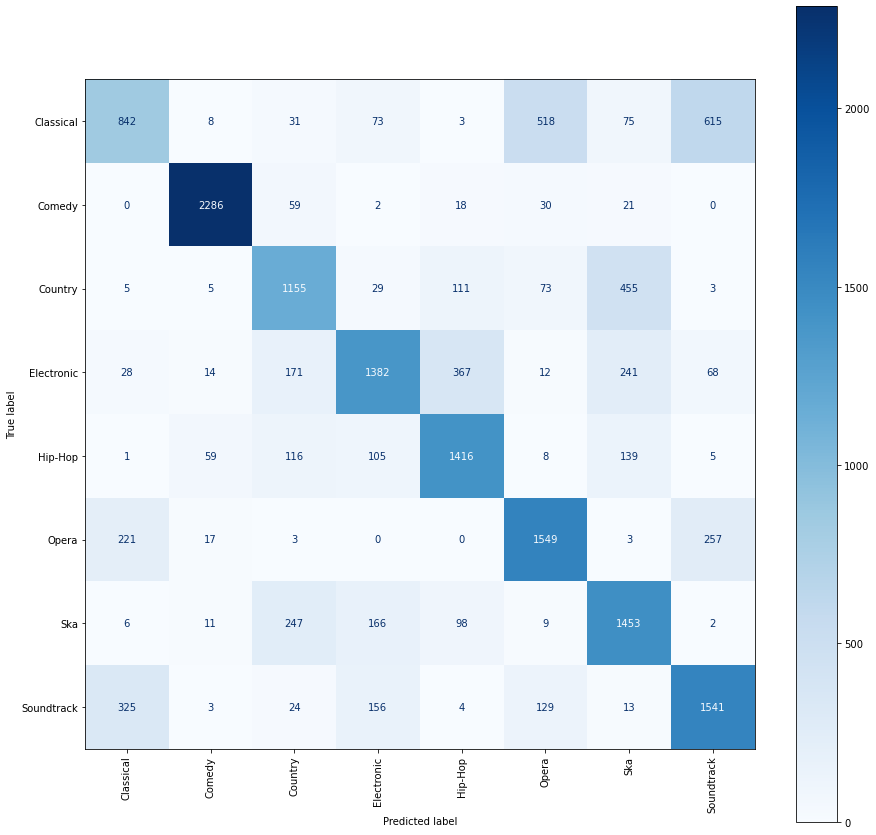

In [199]:
fig, ax = plt.subplots(figsize=(15, 15))
disp = plot_confusion_matrix(lsvm, X_test, y_test, cmap = plt.cm.Blues, ax = ax, xticks_rotation = 'vertical')
plt.show()

# Model Performance Comparison

1. Creates 5 bar plots for each of the metrics of accuracy, precision, recall, F1-score, log-loss metrics for each of the 4 models

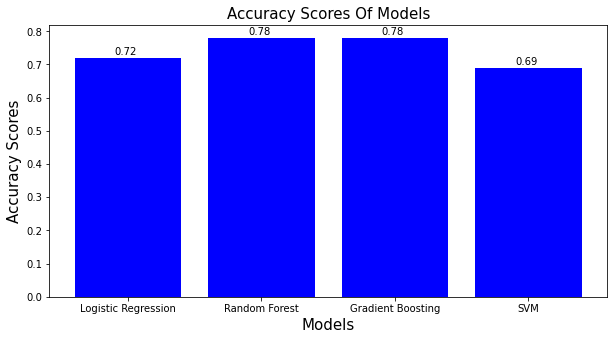

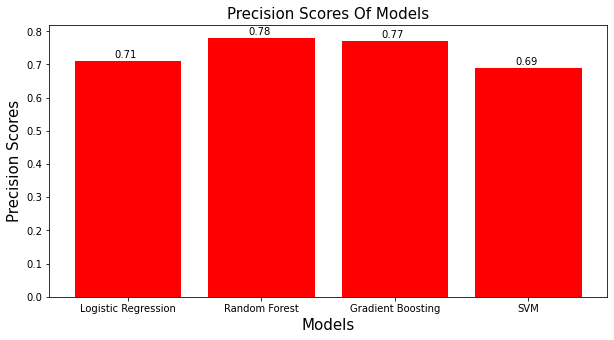

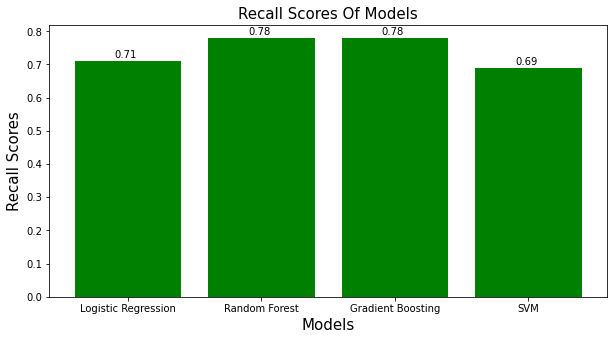

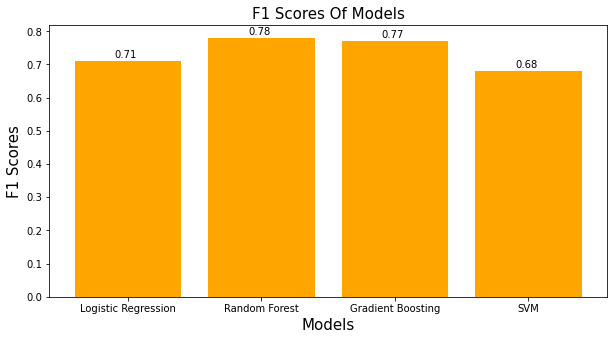

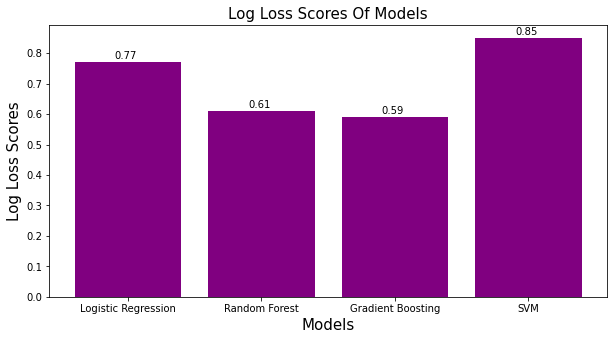

In [210]:
labels = ['Logistic Regression','Random Forest','Gradient Boosting', 'SVM']

# Plotting Accuracy Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Accuracy Scores', fontsize = 15)
plt.title('Accuracy Scores Of Models', fontsize = 15)

bars = plt.bar(labels, accuracy, color = 'blue')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

# Plotting Precision Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Precision Scores', fontsize = 15)
plt.title('Precision Scores Of Models', fontsize = 15)

bars = plt.bar(labels, precision, color = 'red')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

# Plotting Recall Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Recall Scores', fontsize = 15)
plt.title('Recall Scores Of Models', fontsize = 15)

bars = plt.bar(labels, recall, color = 'green')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

# Plotting F1 Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('F1 Scores', fontsize = 15)
plt.title('F1 Scores Of Models', fontsize = 15)

bars = plt.bar(labels, f1, color = 'orange')
for bar in bars:
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

# Plotting Log Loss Scores
plt.figure(figsize = (10,5))
plt.xlabel('Models', fontsize = 15)
plt.ylabel('Log Loss Scores', fontsize = 15)
plt.title('Log Loss Scores Of Models', fontsize = 15)

bars = plt.bar(labels, logloss, color = 'purple')
for bar in bars: 
    plt.text(bar.get_x() + 0.3, bar.get_height() + 0.01, bar.get_height())
plt.show()

2. Plots the ROC-AUC curves for multi classification model

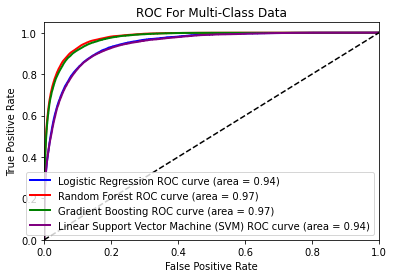

In [176]:
# Plots models ROC curves and areas under curve
for fp, tp, color, roc in zip(fpr, tpr, colors, roc_auc): 
    plt.plot(fpr[fp], tpr[tp], color = color, lw = 2, label = '{0} ROC curve (area = {1:0.2f})'.format(roc, roc_auc[roc]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC For Multi-Class Data')
plt.legend(loc = "lower right")
plt.show()

The best model seems to be the random forest model since it has the lowest log loss score (0.61) and the highest accuracy (0.78), precision (0.78), recall (0.78), f1 (0.78), and ROC-AUC (0.97) scores.

3. Optimal Model Feature Importances

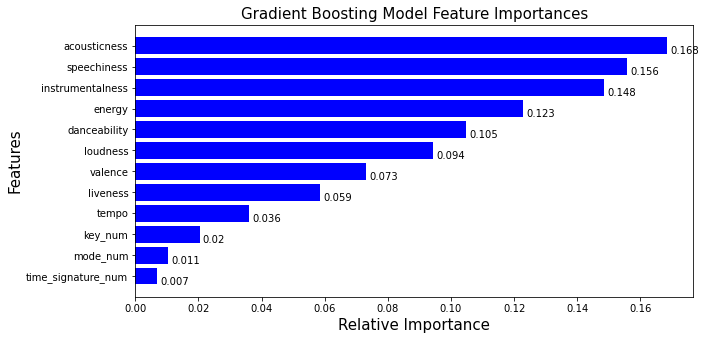

In [211]:
importances = rf.feature_importances_

plt.figure(figsize=(10,5))
bars = plt.barh(X_train.columns.values[np.argsort(importances)], np.sort(importances), color = 'b')

for bar in bars:
    plt.text(bar.get_width() + 0.001, bar.get_y(), round(bar.get_width(),3))
    
plt.xlabel('Relative Importance',fontsize = 15)
plt.ylabel('Features', fontsize = 15)
plt.title('Gradient Boosting Model Feature Importances', fontsize = 15)
plt.show()

# Song Genres Classifier & Similar Songs Recommender Function

Product Use Case: Music streaming platforms like Spotify might not be able to label all songs that come out on a hourly basis on their platform into their respective genres. Therfore, using a ML model to predict the genre(s) the song might belong to would be useful for the company. The function below classifies the song into one of 8 genre labels and in addition gives the next 2 most likely genre labels that it could be potentially classified into, in case the company decided to classify songs into more than one genre if the probabilty of classification into those other genres reaches a certain thershold.

In [306]:
def predict_genres():
   
    # Prompts the user for track
    while True:
        track = input('Please enter track name to find its genre:\n').upper()
        artist = input('Please enter artist name of song to find its genre:\n').upper()
        if df[(df.artist_name == artist) & (df.track_name == track)].shape == (1,40): 
            break 
        else:
            print('Please enter valid input')
    
    # Predicts genre of the song
    result = df[(df.artist_name == artist) & (df.track_name == track)]
    f_result = result[features]
    pred = rf.predict(f_result)  
    
    print('The genre the song can be classified into is: {0}'.format(''.join(pred)))
    
    # Add new song data to training set and retrain classifier
#     X_train.append(result)
#     y_train.append(result.genre)
#     rf.fit(X_train, y_train)

In [286]:
# def predict_more_genres():
result = df[(df.artist_name == 'BO BURNHAM') & (df.track_name == 'SAD')]
f_result = result[features]
pred = rf.predict(f_result)  

# Gives the next 2 likeliest genres that the song can be classified into 
probs = gb.predict_proba(f_result)
print(probs)
for i in range(len(probs)):
    print(rf.classes_[probs[i].argsort()[::-1][1:3]])
    print(np.sort(probs[i])[::-1][1:3])
    # one = rf.classes_[probs[i].argsort()[::-1][1:2]]
    two = rf.classes_[probs[i].argsort()[::-1][2:3]]
    print(two)
    #print('The next 2 likeliest genres the song can be classified into are: {0}'.format())
probs_classes 

[[0.03954971 0.68441716 0.09596483 0.03623955 0.01549812 0.03526167
  0.08406483 0.00900412]]
['Country' 'Ska']
[0.09596483 0.08406483]
['Ska']


array(['Comedy', 'Country'], dtype=object)

In [302]:
# def predict_k_nearest_tracks():
    

In [303]:
predict_genres()

Please enter track name to find its genre:
bid
Please enter artist name of song to find its genre:
dfkv
Please enter valid input
Please enter track name to find its genre:
sad
Please enter artist name of song to find its genre:
bo burnham
The genre the song can be classified into is: Comedy


In [ ]:
# predict_k_nearest_tracks()